# Modelo de Regresión Logística

Este notebook implementa un modelo de regresión logística para predecir la causa de defunción. Se enfoca en las 3 causas más frecuentes del conjunto de datos `defunciones_simplified.csv`.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Cargar los datos procesados
df = pd.read_csv("../defunciones_simplified.csv")

# Seleccionar las 3 causas más comunes
top_3_causas = df['causa'].value_counts().nlargest(3).index
df = df[df['causa'].isin(top_3_causas)]

# Separar variables predictoras y variable objetivo
X = df.drop(columns=["causa"])
y = df["causa"]

# Detectar columnas categóricas
cat_features = X.select_dtypes(include='object').columns.tolist()

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear pipeline de preprocesamiento + modelo
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Entrenar modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones y evaluar
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

                                                                precision    recall  f1-score   support

Diabetes mellitus no especificada, sin mención de complicación       0.42      0.32      0.37      9352
          Infarto agudo del miocardio, sin otra especificación       0.50      0.83      0.63     17193
                                     Neumonía, no especificada       0.98      0.27      0.42     12507

                                                      accuracy                           0.53     39052
                                                     macro avg       0.64      0.47      0.47     39052
                                                  weighted avg       0.64      0.53      0.50     39052



## Matriz de Confusión

Visualizamos gráficamente el rendimiento del modelo utilizando una matriz de confusión.

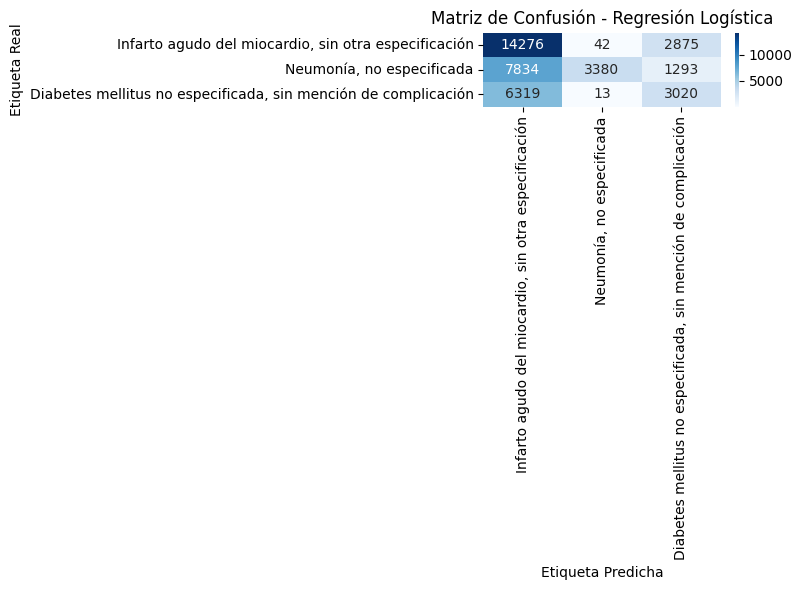

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=top_3_causas)

# Crear un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=top_3_causas, yticklabels=top_3_causas)
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.tight_layout()
plt.show()

Los resultados del modelo de regresión logística muestran un desempeño mixto. Aunque logra una precisión relativamente alta para la clase “Neumonía, no especificada” (0.98), su capacidad para identificar correctamente esta clase es muy baja (recall de 0.27), lo que indica que predice muchas veces esta clase cuando no lo es (falsos positivos). En contraste, el modelo tiene mejor equilibrio para “Infarto agudo del miocardio” (precisión 0.50, recall 0.83), lo que sugiere que es la clase mejor identificada. La clase “Diabetes mellitus no especificada” muestra bajo desempeño general, con métricas por debajo de 0.4. La exactitud global es de 53%, lo cual es modesto, y la matriz de confusión confirma que la mayoría de los errores provienen de confusiones entre “Diabetes” y “Infarto”, así como de la sobrepredicción de “Neumonía”. Esto sugiere que el modelo tiene dificultades para distinguir claramente entre estas causas y podría beneficiarse de técnicas más robustas como Random Forest, Support Vector Machine (SVM) o un ajuste más cuidadoso de los datos de entrada.